In [122]:
# importing packages and data
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 


store = pd.read_csv(r'C:\Users\alexa\OneDrive\Desktop\superstore\Sample - Superstore Recoding - superstore.csv', encoding='utf-8')

Formating Data

In [15]:
store = pd.set_option('display.max_columns', None)

In [18]:
store.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [19]:
store[['Sales', 'Profit']] = store[['Sales', 'Profit']].apply(pd.to_numeric).round(2)

In [113]:
store.drop('Row ID', axis=1, inplace=True)

In [138]:
store.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [137]:
store[['Order Date', 'Ship Date']] = store[['Order Date', 'Ship Date']].apply(pd.to_datetime)

time between order and ship date by ship mode

Text(0, 0.5, 'Days')

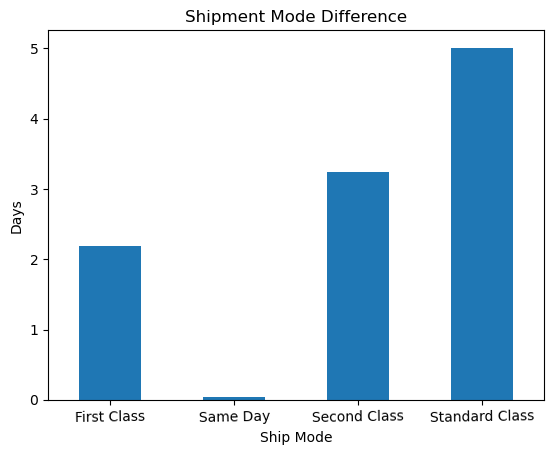

In [22]:
# calculate difference between dates
store[['Order Date', 'Ship Date']] = store[['Order Date', 'Ship Date']].apply(pd.to_datetime)
store['Date Difference'] = (store['Ship Date'] - store['Order Date']).dt.days
date_caculation = store.groupby('Ship Mode')['Date Difference'].mean()
# graph
date_caculation.plot(kind="bar", title="test")

plt.xticks(rotation=1, horizontalalignment="center")
plt.title("Shipment Mode Difference")
plt.xlabel("Ship Mode")
plt.ylabel("Days")

Category Sales

In [23]:
store.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Date Difference
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,7


Text(0, 0.5, 'Sales')

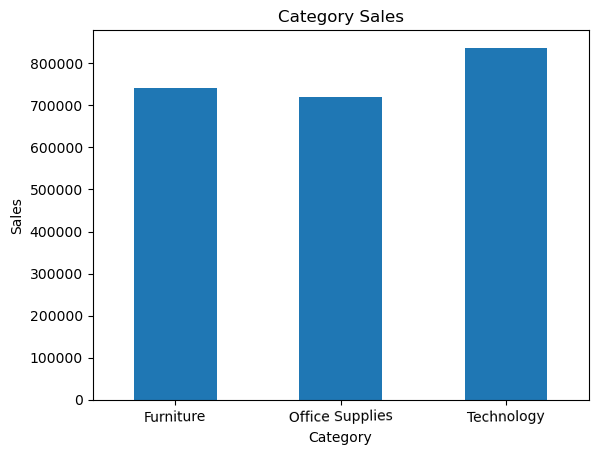

In [67]:
# Sum of category sales
sales_sum = store.groupby('Category')['Sales'].sum()

# graph
sales_sum.plot(kind="bar", title="test")

plt.xticks(rotation=1, horizontalalignment="center")
plt.title("Category Sales")
plt.xlabel("Category")
plt.ylabel("Sales")


Top State Profits

In [104]:
city_profit = store.groupby('State', as_index=False)['Profit'].sum().round(2).sort_values('Profit', ascending=False).head(10)
print(city_profit)

         State    Profit
3   California  76381.39
30    New York  74038.55
45  Washington  33402.65
20    Michigan  24463.19
44    Virginia  18597.95
12     Indiana  18382.94
9      Georgia  16250.04
15    Kentucky  11199.70
21   Minnesota  10823.19
6     Delaware   9977.37


Popular Products

In [106]:
popular = store['Product Name'].value_counts().head(10)
print(popular)


Staple envelope                                              48
Staples                                                      46
Easy-staple paper                                            46
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      19
Staple remover                                               18
KI Adjustable-Height Table                                   18
Storex Dura Pro Binders                                      17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: Product Name, dtype: int64


In [116]:
# Most expensive products
expensive = test[['Product Name', 'Sales']].drop_duplicates().sort_values('Sales', ascending=False).round(2).head(10)
print(expensive)

                                           Product Name     Sales
2697  Cisco TelePresence System EX90 Videoconferenci...  22638.48
6826              Canon imageCLASS 2200 Advanced Copier  17499.95
8153              Canon imageCLASS 2200 Advanced Copier  13999.96
2623              Canon imageCLASS 2200 Advanced Copier  11199.97
4190              Canon imageCLASS 2200 Advanced Copier  10499.97
9039   GBC Ibimaster 500 Manual ProClick Binding System   9892.74
4098               Ibico EPK-21 Electric Binding System   9449.95
4277   3D Systems Cube Printer, 2nd Generation, Magenta   9099.93
8488  HP Designjet T520 Inkjet Large Format Printer ...   8749.95
6425              Canon imageCLASS 2200 Advanced Copier   8399.98


In [114]:
store.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


What time of year has the most orders

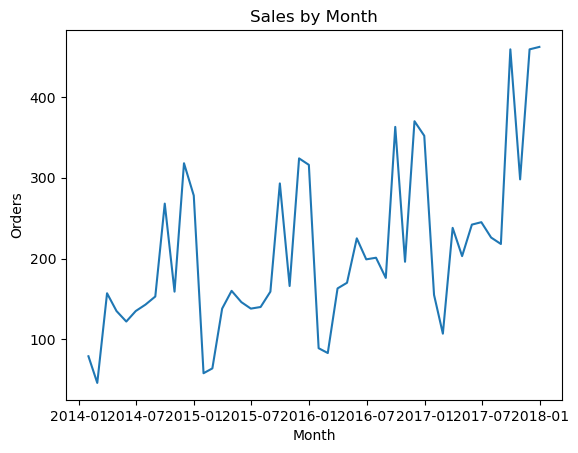

In [148]:
months = store.groupby(pd.Grouper(key='Order Date', axis=0, freq='M'))['Order Date'].count()

# graph
plt.plot(months)
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Orders")
plt.show()